# **1. Persiapan**

### **Import library yang dibutuhkan**

* Mengimpor pandas, pustaka Python yang digunakan untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame dan Series).
* Mengimpor NumPy, pustaka untuk perhitungan numerik dan array multidimensi.
* Mengimpor Seaborn, pustaka visualisasi data yang dibangun di atas matplotlib.
* Mengimpor modul pyplot dari Matplotlib, pustaka utama untuk membuat grafik dan visualisasi di Python.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **Sambungkan ke google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_data = "/content/drive/MyDrive/Capstone Bengkel Coding/Dataset/ObesityDataSet.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Baca dataset**

Head digunakan untuk menampilkan kepala dataset, nilai defaultnya 5 record data, namun bisa kita tetapkan berapa banyak data yang akan ditampilkan.

In [ ]:
df = pd.read_csv(path_data)
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Tail digunakan untuk menampilkan ekor dari data, maksud dari ekor adalah record terakhir dari data.

In [ ]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


### **Cek info dataset untuk mengetahui data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Info dari dataset menunjukkan bahwa terdapat sebanyak 2111 record data dapam dataset ini. Namun, dari hasil pengecekan terdapat data yang hilang, hal ini ditandai dengan jumlah record data yang tidak sama antar satu kolom dengan kolom yang lainnya.

# **2. Visualisasi Data**

### **Distribusi untuk fitur numerik (kontinu + integer)**

Pada bagian ini kami menampilkan sebaran data pada kolom yang bertipe numerik.

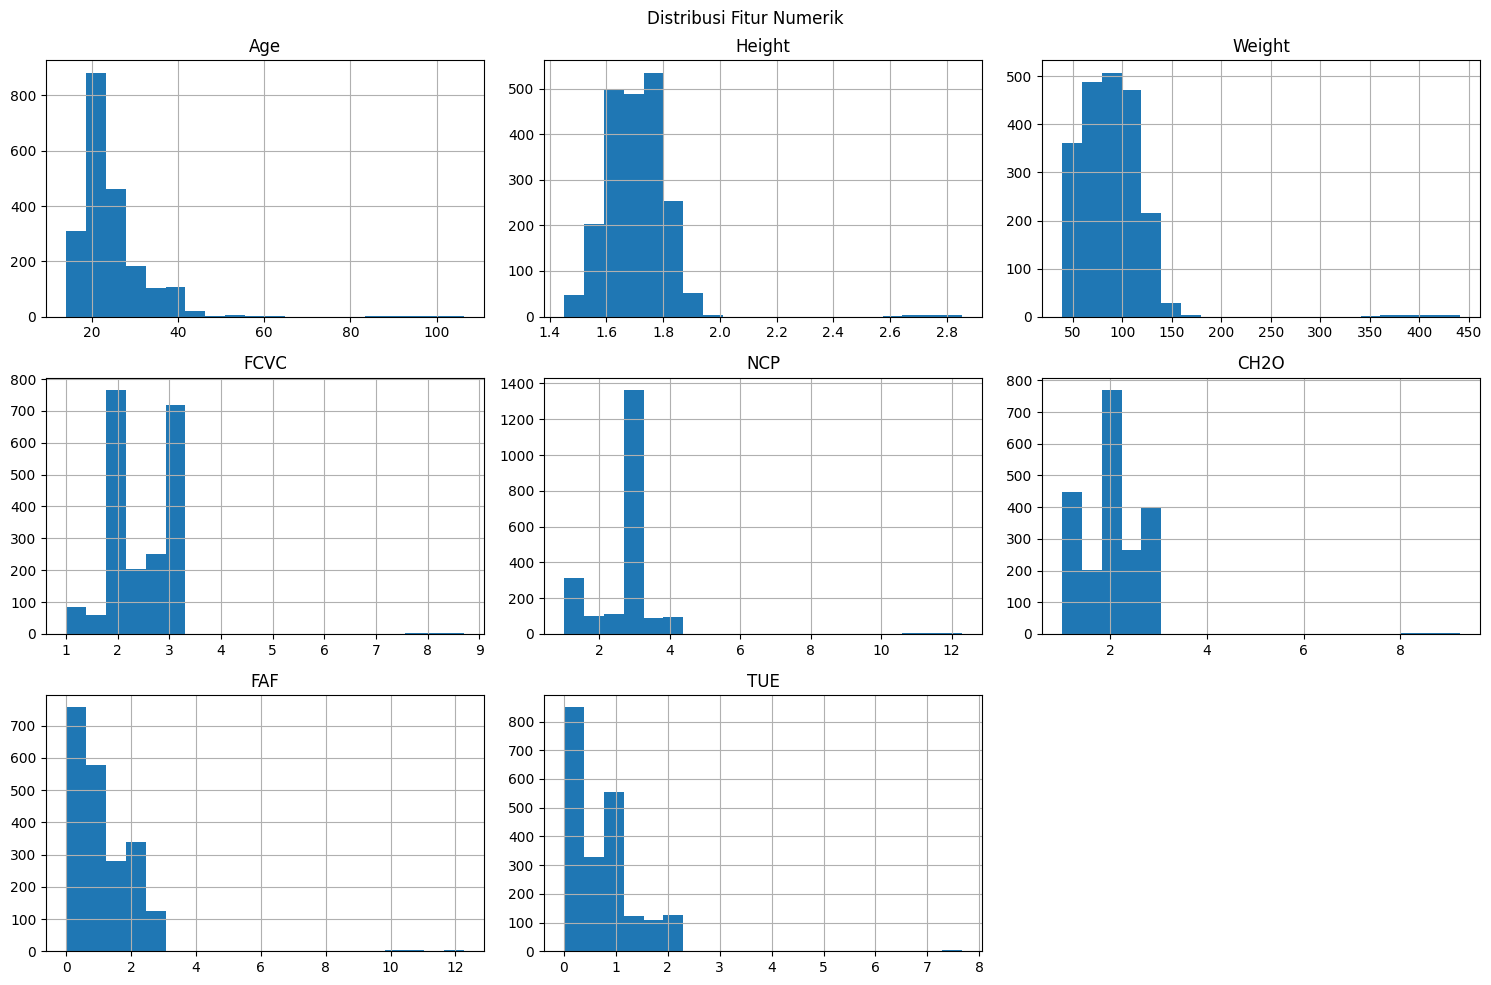

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah kolom-kolom numerik menjadi tipe float/int (jika masih object)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot histogram
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Dari deskripsi data di atas ada kemungkinan data memiliki outlayer, dapat dilihat pada kolom age, height, weight, dst. Nilai-nilai yang ada tidak masuk akal sehingga perlu dilakukan penormalan.

### **Distribusi kelas target**

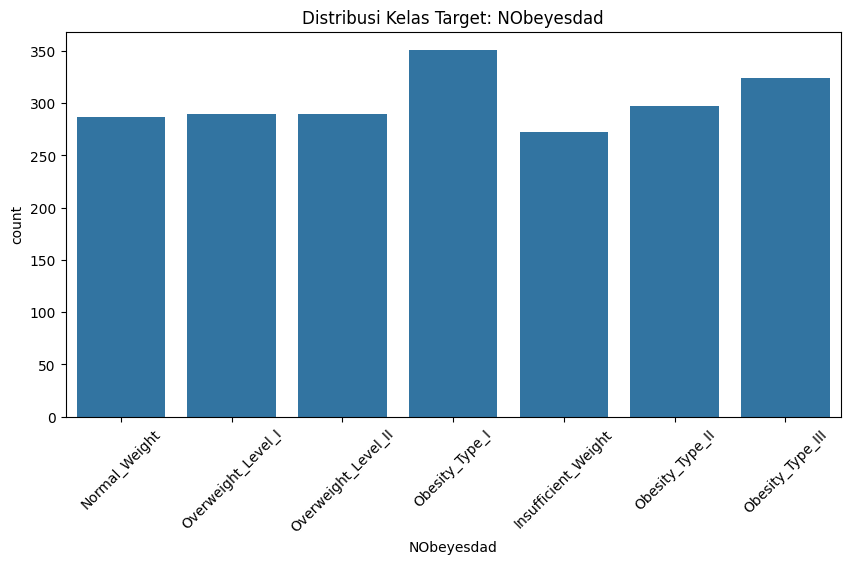

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="NObeyesdad")
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target: NObeyesdad")
plt.show()

Distribusi class target cukup merata di kisaran >250 dan <350, tidak terdapat perbedaan yang cukup signifikan, namun nantinya tetap perlu dilakukan preprocessing agar data menjadi berkualitas baik.

# **3. Analisis Missing Values, Nilai Unik, Duplikat, Keseimbangan Data, dan Outlier**

### **Cek Missing Values**

In [ ]:
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


Hasil di atas menunjukkan bahwa beberapa kolom masing mengandung missing value, ini perlu dibersihkan agar dataset menjadi normal nantinya.

### **Cek Nilai Unik**

In [ ]:
print("\nJumlah nilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


Jumlah nilai unik per kolom:
Age: 1393 nilai unik
Gender: 3 nilai unik
Height: 1561 nilai unik
Weight: 1517 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 807 nilai unik
NCP: 636 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1262 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1185 nilai unik
TUE: 1129 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


Nilai unik menandakan ada berapa banyak nilai unik yang ada pada kolom-kolom yang ada, ini perlu dianalisis karena terkadang ada nilai yang tidak dikenali atau bahkan mengarang seperti tanda tanya (?).

### **Cek Data Duplikat**

In [ ]:
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


Data duplikat menunjukkan berapa banyak record yang memiliki value sama, hasil menunjukkan terdapat sebanyak 18 record data yang terdeteksi sebagai data duplikat.

### **Cek Keseimbangan Kelas Target**

In [ ]:
print("\nDistribusi label:")
print(df["NObeyesdad"].value_counts(normalize=True))


Distribusi label:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


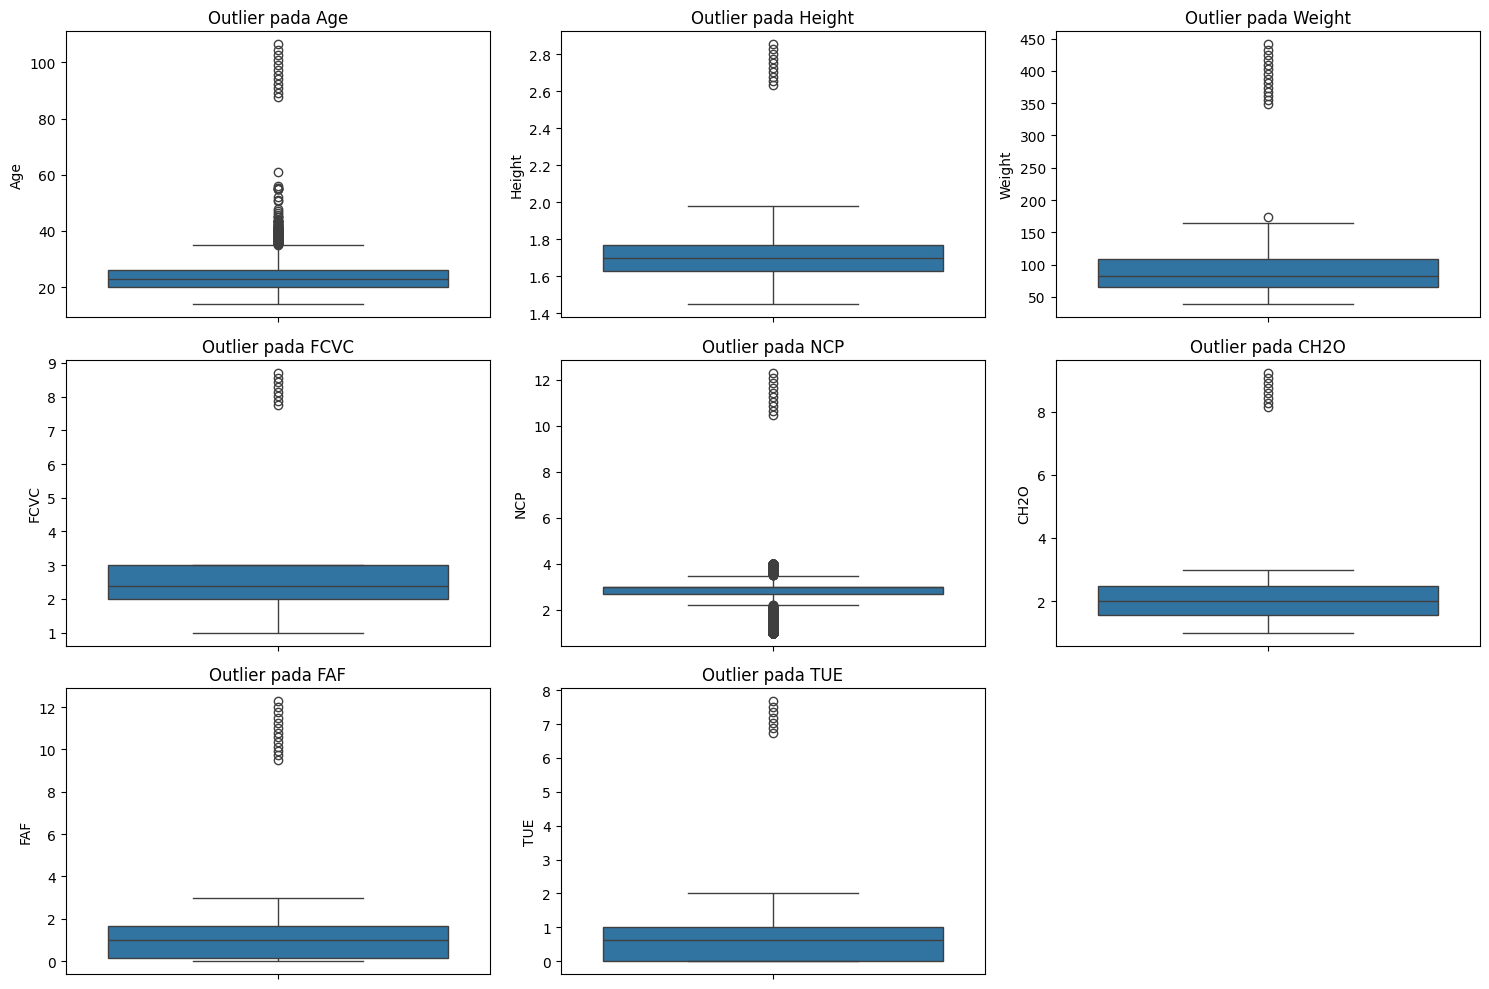

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat kita lihat bahwa dalam tiap-tiap kolom ternyata terdapat data outlier. Bisa kita lihat tanda bundar-bundar itu menunjukkan bahwa data ada yang tidak sesuai dengan kebanyakan, boleh jadi nilainya terlalu besar sehingga perlu dinormalisasi nanti dalam proses preprocessing.

# **4. Preprocessing**

### **Penghapusan nilai Null**

Pada bagian ini kita akan melakukan penghapusan pada data yang bernilai Null yang telah teridentifikasi sebelumnya.

In [ ]:
# Tangani missing values (hapus atau imputasi)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1889 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1889 non-null   float64
 1   Gender                          1889 non-null   object 
 2   Height                          1889 non-null   float64
 3   Weight                          1889 non-null   float64
 4   CALC                            1889 non-null   object 
 5   FAVC                            1889 non-null   object 
 6   FCVC                            1889 non-null   float64
 7   NCP                             1889 non-null   float64
 8   SCC                             1889 non-null   object 
 9   SMOKE                           1889 non-null   object 
 10  CH2O                            1889 non-null   float64
 11  family_history_with_overweight  1889 non-null   object 
 12  FAF                             1889 no

### **Penghapusan data duplikat**

Sebelumnya pada juga telah kita identifikasi bahwa terdapat data yang duplikat sebanyak 18 record. Pada bagian ini data yang duplikat akan kita hapus.

In [ ]:
# Buang duplikat
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1871 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1871 non-null   float64
 1   Gender                          1871 non-null   object 
 2   Height                          1871 non-null   float64
 3   Weight                          1871 non-null   float64
 4   CALC                            1871 non-null   object 
 5   FAVC                            1871 non-null   object 
 6   FCVC                            1871 non-null   float64
 7   NCP                             1871 non-null   float64
 8   SCC                             1871 non-null   object 
 9   SMOKE                           1871 non-null   object 
 10  CH2O                            1871 non-null   float64
 11  family_history_with_overweight  1871 non-null   object 
 12  FAF                             1871 no

### **Penghapusan inputan tidak valid**

Setelah proses penghapusan data null dan data yang duplikat, selanjutnya kita melakukan identifikasi pada inputan yang tidak valid. Ketika dilakukan pengecekan ada inputan yang nilainya "?", maka dalam kasus ini akan kita hapus alih-alih diganti dengan data mayoritas atau data rata-rata.

In [ ]:
kolom = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in kolom:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male' '?']
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always']
----------------------------------------
Kolom: FAVC
['no' 'yes' '?']
----------------------------------------
Kolom: SCC
['no' 'yes' '?']
----------------------------------------
Kolom: SMOKE
['no' 'yes' '?']
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no' '?']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no' '?']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?']
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------


In [ ]:
# bersihkan spasi berlebihan pada seluruh kolom bertipe object (string)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# ganti tanda "?" dengan NaN
df.replace("?", np.nan, inplace=True)

# ganti NaN dengan nilai mayoritas (modus) di setiap kolom
for col in df.columns:
    if df[col].dtype == "object":  # hanya untuk kolom kategorikal
        mode_value = df[col].mode()[0]  # ambil nilai modus (terbanyak)
        df[col].fillna(mode_value, inplace=True)

# menampilkan jumlah data yang masih memiliki NaN (seharusnya 0 jika sudah bersih)
print("Jumlah data yang masih memiliki NaN setelah imputasi:\n", df.isnull().sum())

Jumlah data yang masih memiliki NaN setelah imputasi:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-126-d94b5b07d1a7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


### **Menangani data outlier**

Sebaran data numerik di bawah menunjukkan bahwa terdapat data yang outlier, maka selanjutnya data yang outlier perlu untuk dibersihkan. Pembersihan data outlier ditujukan agar data yang dihasilkan menjadi berkualitas dan tidak keluar dari standar normal yang ada.

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,24.770383,1.708407,89.017473,2.447022,2.753488,2.030647,1.082590,0.684811
std,8.624885,0.120062,37.246267,0.652882,0.990781,0.746956,1.181643,0.730294
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.952931,1.630000,65.328560,2.000000,2.734392,1.584812,0.119641,0.000000
50%,22.804818,1.704193,83.016968,2.397280,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.770468,108.224463,3.000000,3.000000,2.473548,1.697675,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Dalam penanganan data outlier kami menerapkan metode IQR, dilansir dari Medium

Rentang Interkuartil, atau IQR, adalah ukuran penyebaran statistik. Rentang ini merupakan rentang yang mencakup 50% data di bagian tengah. Untuk menghitung IQR, Anda perlu mencari selisih antara persentil ke-75 (Q3) dan persentil ke-25 (Q1).

Setiap titik data yang berada di bawah batas bawah (Q1–1,5 * IQR) dianggap sebagai outlier. Nilai-nilai ini jauh lebih rendah daripada mayoritas kumpulan data dan berpotensi untuk dihapus atau diselidiki lebih lanjut.

Sebaliknya, setiap titik data yang melampaui batas atas (Q3 + 1,5 * IQR) juga dianggap sebagai outlier . Nilai-nilai ini jauh lebih tinggi daripada mayoritas kumpulan data dan mungkin memerlukan perhatian khusus.

Salah satu keuntungan metode IQR adalah ketahanannya terhadap distribusi data yang tidak merata. Metode ini mengidentifikasi outlier berdasarkan persentil, sehingga tidak terlalu sensitif terhadap nilai ekstrem.

In [ ]:
# Hapus outlier (misalnya dengan IQR)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,23.144453,1.715131,92.504880,2.456863,2.976889,2.060705,1.031469,0.693352
std,4.102400,0.087400,27.473986,0.546924,0.115006,0.601654,0.855703,0.586877
min,14.000000,1.450000,39.000000,1.000000,2.390070,1.000000,0.000000,0.000000
25%,20.000000,1.649546,70.110694,2.000000,3.000000,1.734719,0.143955,0.105905
50%,22.760437,1.717688,91.132174,2.557486,3.000000,2.000000,1.000000,0.681950
75%,25.982224,1.774931,113.047888,3.000000,3.000000,2.553805,1.630179,1.000000
max,35.000000,1.980000,173.000000,3.000000,3.362758,3.000000,3.000000,2.000000


### **Encoding data kategorikal**

Untuk data kategorikal perlu dilakukan encoding karena mesin tidak bisa memproses teks string namun bisa memproses angka. Proses encoding dilakukan secara manual agar mappingnya dapat dipantau. Sehingga dalam proses implementasi nantinya inputan bisa kita sesuaikan berdasarkan label pada mapping yang telah dibuat.

In [ ]:
kolom = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in kolom:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male']
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently']
----------------------------------------
Kolom: FAVC
['no' 'yes']
----------------------------------------
Kolom: SCC
['no' 'yes']
----------------------------------------
Kolom: SMOKE
['no' 'yes']
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_II' 'Insufficient_Weight'
 'Obesity_Type_III']
----------------------------------------


Pelabelan pada kolom Gender "Jenis kelamin"

In [ ]:
gender_map = {
    'Female': 0,
    'Male': 1
}
df['Gender'] = df['Gender'].map(gender_map)

Pelabelan pada kolom CALC "Seberapa sering Anda mengonsumsi alkohol?"

In [ ]:
calc_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2
}
df['CALC'] = df['CALC'].map(calc_map)

Pelabelan pada kolom FAVC "Apakah Anda sering mengonsumsi makanan tinggi
kalori?"

In [ ]:
favc_map = {
    'no': 0,
    'yes': 1
}
df['FAVC'] = df['FAVC'].map(favc_map)

Pelabelan pada kolom SCC "Apakah Anda memantau asupan kalori harian Anda?"

In [ ]:
scc_map = {
    'no': 0,
    'yes': 1
}
df['SCC'] = df['SCC'].map(scc_map)

Pelabelan pada kolom SMOKE "Apakah Anda merokok?"

In [ ]:
smoke_map = {
    'no': 0,
    'yes': 1
}
df['SMOKE'] = df['SMOKE'].map(smoke_map)

Pelabelan pada kolom Family History "Apakah ada anggota keluarga yang pernah atau sedang mengalami kelebihan berat badan?"

In [ ]:
family_map = {
    'no': 0,
    'yes': 1
}
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(family_map)

Pelabelan pada kolom CAEC "Apakah Anda makan camilan di antara waktu
makan?"

In [ ]:
caec_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
df['CAEC'] = df['CAEC'].map(caec_map)

Pelabelan pada kolom MTRANS "Jenis transportasi apa yang biasa Anda
gunakan?"

In [ ]:
trans_map = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
df['MTRANS'] = df['MTRANS'].map(trans_map)

Pelabelan pada kolom NObeyesdad "Tingkat obesitas"

In [ ]:
obesity_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_map)

Hasil akhir dari pelabelan adalah sebagai berikut:

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,1,0,1
1,21.0,0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,23.0,1,1.80,77.0,2,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,0,1
3,27.0,1,1.80,87.0,2,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1,2
5,29.0,1,1.62,53.0,1,1,2.0,3.0,0,0,2.0,0,0.0,0.0,1,2,1


### **Pemilihan fitur penting dan tidak penting**

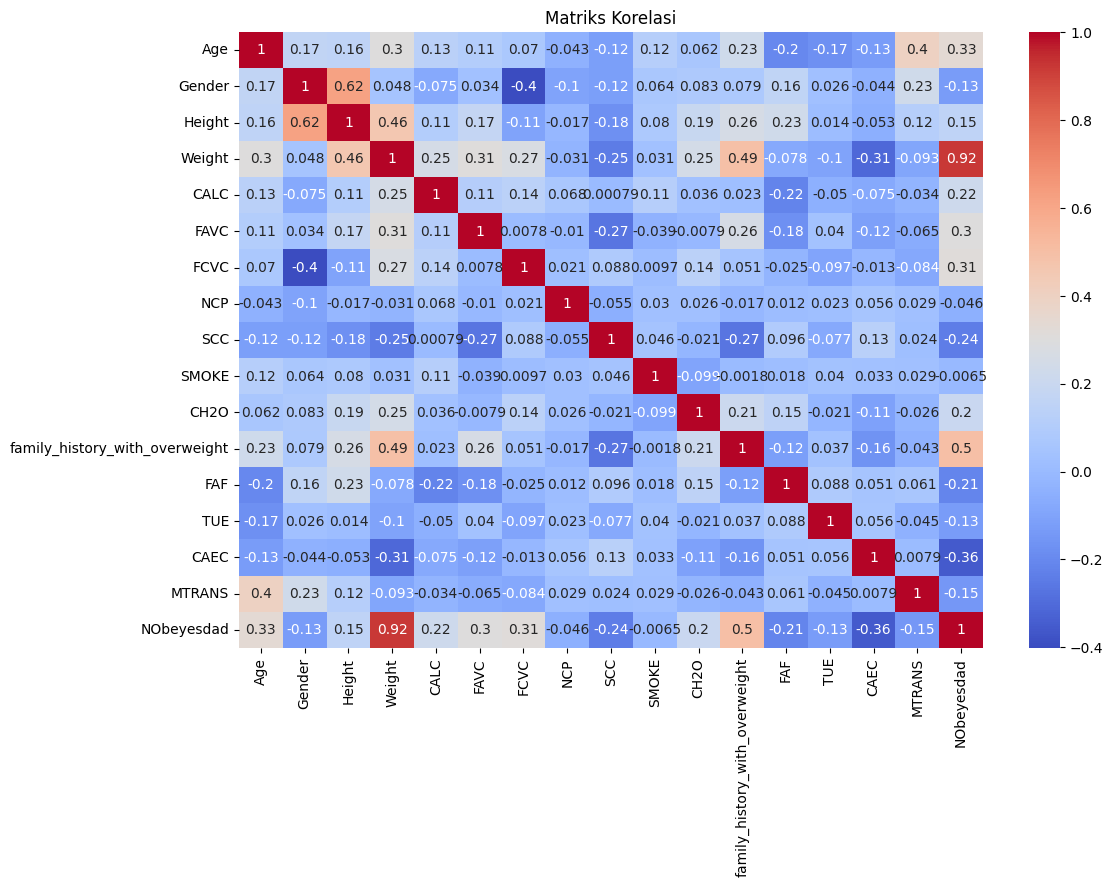

CAEC                             -0.355944
SCC                              -0.240436
FAF                              -0.212353
MTRANS                           -0.147904
Gender                           -0.129871
TUE                              -0.129348
NCP                              -0.045793
SMOKE                            -0.006462
Height                            0.152357
CH2O                              0.197959
CALC                              0.217088
FAVC                              0.302492
FCVC                              0.312531
Age                               0.332920
family_history_with_overweight    0.500217
Weight                            0.918350
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antara fitur numerik dan target
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

# Cek fitur dengan korelasi rendah ke target
print(corr["NObeyesdad"].sort_values())

Berdasarkan hasil analisis korelasi terhadap target NObeyesdad, fitur SMOKE dan NCP dihapus dari dataset karena menunjukkan korelasi yang sangat rendah, masing-masing sebesar -0.006 dan -0.045. Nilai korelasi yang hampir nol ini mengindikasikan bahwa kedua fitur tersebut tidak memiliki hubungan yang signifikan dengan tingkat obesitas, sehingga kontribusinya terhadap model prediksi sangat kecil. Dengan menghapus SMOKE dan NCP, proses pelatihan model dapat menjadi lebih efisien tanpa kehilangan informasi yang penting, sementara fitur-fitur lain tetap dipertahankan karena dinilai memiliki pengaruh yang lebih besar terhadap target.

In [ ]:
# Hapus kolom 'SMOKE' dan 'NCP' dari dataset
df.drop(columns=['SMOKE', 'NCP'], inplace=True)

### **Penerapan scaling**

Scaling perlu dilakukan karena fitur dengan skala besar (misalnya Weight dalam kg) bisa mendominasi fitur lain (seperti CH2O atau FAF) jika tidak dinormalisasi.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Tentukan kolom numerik yang akan discale
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Terapkan fit_transform pada kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Cek hasil scaling
df.head(20)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.333333,0,0.320755,0.186567,0,0,0.5,0,0.5,1,0.000000,0.5,1,0,1
1,0.333333,0,0.132075,0.126866,1,0,1.0,1,1.0,1,1.000000,0.0,1,0,1
2,0.428571,1,0.660377,0.283582,2,0,0.5,0,0.5,1,0.666667,0.5,1,0,1
3,0.619048,1,0.660377,0.358209,2,0,1.0,0,0.5,0,0.666667,0.0,1,1,2
5,0.714286,1,0.320755,0.104478,1,1,0.5,0,0.5,0,0.000000,0.0,1,2,1
6,0.428571,0,0.094340,0.119403,1,1,1.0,0,0.5,1,0.333333,0.0,1,3,1
7,0.380952,1,0.358491,0.104478,1,0,0.5,0,0.5,0,1.000000,0.0,1,0,1
9,0.380952,1,0.509434,0.216418,0,1,0.5,0,0.5,1,0.333333,0.5,1,0,1
10,0.571429,1,0.754717,0.492537,1,1,1.0,0,1.0,1,0.666667,1.0,2,0,4
11,0.333333,0,0.509434,0.305970,1,1,0.5,1,0.5,1,0.666667,0.5,2,0,3


### **Simpan hasil preprocessing**

Hasil preprocessing disimpan untuk dilakukan training.

In [ ]:
# Simpan ke file CSV
df.to_csv('data_preprocessed.csv', index=False)

# Simpan ke file Excel
df.to_excel('data_preprocessed.xlsx', index=False)

Kesimpulan akhir dari tahapan ini adalah bahwa preprocessing perlu dilakukan untuk mendapatkan dataset dengan performa yang maksimal, waktu komputasi yang lebih singkat, dan performa model yang terbaik. Berbagai macam teknik preprocessing dilakukan, baik dari penghapusan nilai null, nan, pengendalian data outlier, nilai yang tidak relevan, dan kolom yang tidak memiliki keterkaitan dengan target. Hasil akhir dari dataset ini yaitu menyisakan 1.871 record data yang telah bersih dari total 2.111 record data awal.